<a href="https://colab.research.google.com/github/IsuruMDasanayake/Temperature-Control-System-Fuzzy/blob/main/TempControlFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Temperature Control System**

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

**Define fuzzy variables**

In [ ]:
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

**Membership functions**

In [ ]:
# Membership functions for temp
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['warm'] = fuzz.trimf(temperature.universe, [25, 50, 75])
temperature['hot'] = fuzz.trimf(temperature.universe, [50, 100, 100])

# Membership functions for fan speed
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

**Create fuzzy rules**

In [ ]:
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

**Control System**

In [ ]:
fan_control = ctrl.ControlSystem([rule1, rule2, rule3])
fan_simulation = ctrl.ControlSystemSimulation(fan_control)

In [ ]:
# visualize membership function for input and output
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

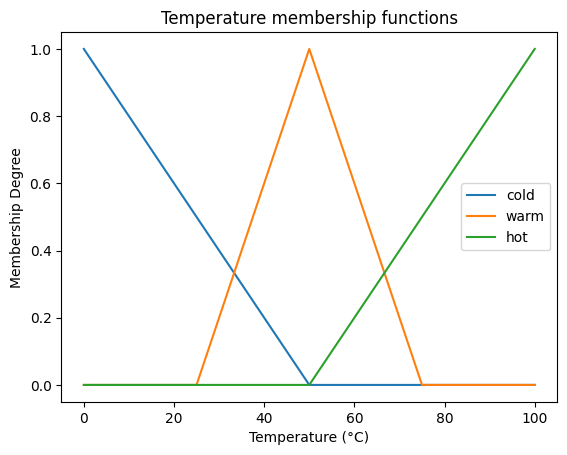

In [ ]:
for mf_name, mf_data in temperature.terms.items():
  plt.plot(temperature.universe, mf_data.mf, label=mf_name)
plt.title('Temperature membership functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()

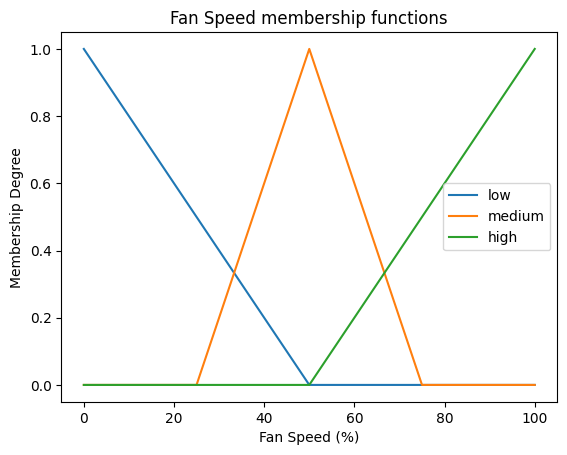

In [ ]:
# Fan speed membership function
for mf_name, mf_data in fan_speed.terms.items():
  plt.plot(fan_speed.universe, mf_data.mf, label=mf_name)
  plt.title('Fan Speed membership functions')
  plt.xlabel('Fan Speed (%)')
  plt.ylabel('Membership Degree')
  plt.legend()

In [ ]:
# Simulate a specific temperature
input_temp = 65
fan_simulation.input['temperature'] = input_temp
fan_simulation.compute()

# Output fan speed
print(f"Temperature: {input_temp}°C")
print(f"Fan Speed: {fan_simulation.output['fan_speed']:.2f} RPM")

Temperature: 65°C
Fan Speed: 62.45 RPM
